In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go

In [21]:
theme = 'dark'
if theme == 'dark':
    plt.style.use('dark_background')
    plotly_template = 'plotly_dark'
else:
    plt.style.use('default')

In [161]:
df_papers = pd.read_csv("../data/papers.csv")

width = 800
height = 800
top_conference_list = ['KDD', 'WWW', 'SIGIR', 'CSS', 'CHI', 'MM']

## Annual Trend

In [211]:
df_paper_groupby_year_type_for_count = df_papers.groupby(["year", "type"]).count().reset_index().rename({'title': 'count'}, axis=1)
df_paper_groupby_year_type_for_count = df_paper_groupby_year_type_for_count[['year', 'type', 'count']]
df_paper_groupby_year_type_for_count['year'] = df_paper_groupby_year_type_for_count['year'].astype(str)
df_paper_groupby_year_type_for_count = df_paper_groupby_year_type_for_count.pivot(index='year', columns='type', values='count').fillna(0).astype(int)
df_paper_groupby_year_type_for_count = df_paper_groupby_year_type_for_count.reset_index()
publication_type_list = df_papers.type.unique().tolist()

fig = px.bar(df_paper_groupby_year_type_for_count, 
                x="year", y=publication_type_list, 
                title="Annual Count Trend",
                color_discrete_sequence=px.colors.sequential.dense[1::2],
                # color_discrete_map={'preprint':'lightcyan',
                #                     'workshop':'cyan',
                #                     'journal':'royalblue',
                #                     'conference':'darkblue'},
                width=width, height=height,
                template=plotly_template)
fig.show()
fig.write_image("figures/annual_count_trend.svg")

## Category Distribution

In [174]:
df_papers_groupby_category_for_count = df_papers.groupby(["category"]).count().reset_index().rename({'title': 'count'}, axis=1)
fig = px.pie(df_papers_groupby_category_for_count, values='count', names='category', 
                title='Category Distribution', 
                # color_discrete_sequence= px.colors.sequential.Plasma_r,
                # color_discrete_sequence= px.colors.sequential.Plasma_r,
                width=width, height=height,
                template=plotly_template)
fig.update_traces(textposition='inside', textinfo='label+percent+value')
fig.show()
fig.write_image("figures/category_distribution.svg")

## Publication Distribution

In [144]:
def get_publisher_type(paper_info):
    if paper_info['type'] != 'conference':
        return paper_info['type'].capitalize()
    else:
        if paper_info['publisher'] in top_conference_list:
            return 'Top Conference'
        else:
            return 'Other Conference'
            
df_papers_groupby_publisher_for_count = df_papers.groupby(["publisher"]).agg({'title': 'count', 'type': 'first'}).reset_index().rename({'title': 'count'}, axis=1)
df_papers_groupby_publisher_for_count['publisher_type'] = df_papers_groupby_publisher_for_count.apply(get_publisher_type, axis=1)
df_papers_groupby_publisher_type_for_count = df_papers_groupby_publisher_for_count.groupby(["publisher_type"]).agg({'count': 'sum'}).reset_index()

In [175]:
sunburst_labels = ['NFT']
sunburst_parents = ['']
sunburst_values = [0]
sunburst_labels += df_papers_groupby_publisher_type_for_count['publisher_type'].values.tolist()
sunburst_parents += ['NFT'] * len(df_papers_groupby_publisher_type_for_count)
sunburst_values += [0] * len(df_papers_groupby_publisher_type_for_count)
sunburst_labels += df_papers_groupby_publisher_for_count['publisher'].values.tolist()
sunburst_parents += df_papers_groupby_publisher_for_count['publisher_type'].values.tolist()
sunburst_values += df_papers_groupby_publisher_for_count['count'].values.tolist()


fig =go.Figure(go.Sunburst(
    labels=sunburst_labels,
    parents=sunburst_parents,
    values=sunburst_values,
)
)
fig.update_layout(
    # margin = dict(t=0, l=0, r=0, b=0), 
    title="Publisher Distribution",
    width=width, height=height,
    template=plotly_template
    )
fig.show()
fig.write_image("figures/publisher_distribution.svg")

## Word Cloud

0.8668451309204102

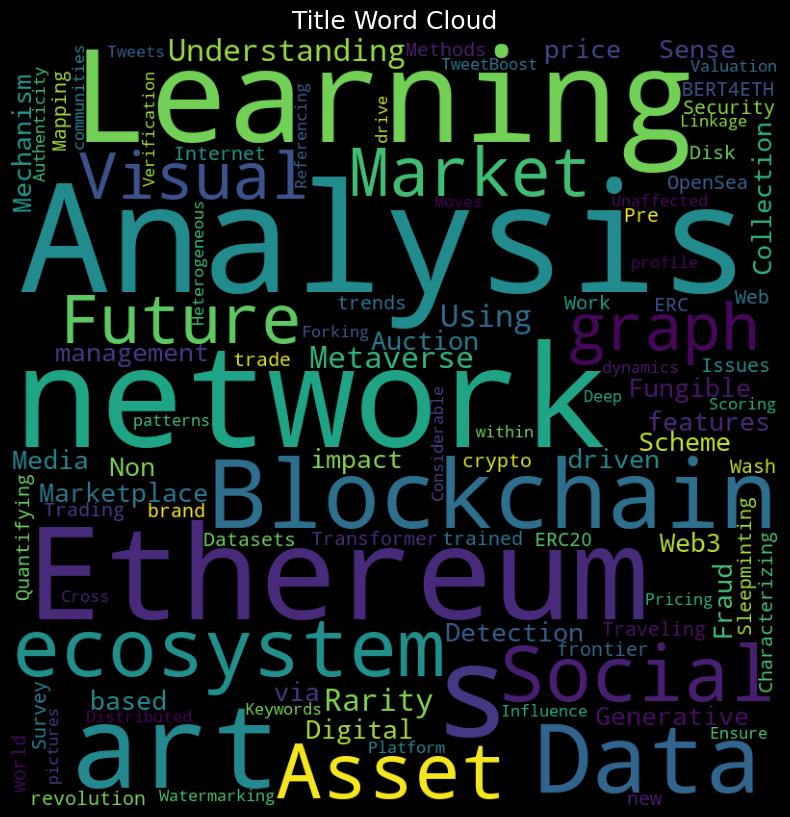

In [210]:
title_list = df_papers.title.tolist()
sentence = ' '.join(title_list)
sentence = sentence.replace('NFTs', '').replace('nfts', '').replace('Nfts', '')
sentence = sentence.replace('NFT\'s', '').replace('nft\'s', '').replace('Nft\'s', '')
sentence = sentence.replace('NFT', '').replace('nft', '').replace('Nft', '')
sentence = sentence.replace('Non-fungible', '').replace('non-fungible', '').replace('Non-Fungible', '')
sentence = sentence.replace('Token\'s', '').replace('token\'s', '').replace('Tokens\'', '').replace('tokens\'', '')
sentence = sentence.replace('Token', '').replace('token', '').replace('Tokens', '').replace('tokens', '')
wc = WordCloud(max_words=100, width=800, height=800).generate(sentence)
plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(wc)
plt.axis("off")
plt.title("Title Word Cloud", fontsize=18)
plt.savefig("figures/title_word_cloud.png", dpi=200)

import os
os.path.getsize("figures/title_word_cloud.png") / 1024 / 1024